# Árvore de decisão


Ilustra o funcionamento do algoritmo de árvore de decisão com dados contínuos.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula

-------------------------------------------------------------------------------

### Base de dados: Sonar, Mines vs. Rocks

https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar,+Mines+vs.+Rocks%29

208 instâncias

60 atributos

2 classes (rocha, mina)



In [1]:
!pip install pydotplus
!pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-0.8.1-cp36-none-any.whl size=21790 sha256=9af04be3de9d63d4b66322443ef79268c04b223ef6b00d06e81e9aa59c431205
  Stored in directory: /root/.cache/pip/wheels/d8/74/06/0d9d450156c7cb2f1fcfb51a55b1542d26f459f557d742c406
Successfully built dtreeviz


In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

from google.colab import files
uploaded = files.upload()

Saving sonar.xlsx to sonar.xlsx


### Carga dos dados e particionamento das bases de treinamento e teste

### Transformação de dados

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


### Particionamento da base

<code>train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.</code>

No código a seguir, são utilizados 10% para teste e 90% para treinamento.







In [7]:
sonar = pd.read_excel('sonar.xlsx', sheet_name=0) 
print("\nDimensões: {0}".format(sonar.shape))
print("\nCampos: {0}".format(sonar.keys()))
print(sonar.describe(), sep='\n')

X = sonar.iloc[:,0:(sonar.shape[1] - 1)]

le = LabelEncoder()
y = le.fit_transform(sonar.iloc[:,(sonar.shape[1] - 1)])

# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)


Dimensões: (208, 61)

Campos: Index(['Atributo_1', 'Atributo_2', 'Atributo_3', 'Atributo_4', 'Atributo_5',
       'Atributo_6', 'Atributo_7', 'Atributo_8', 'Atributo_9', 'Atributo_10',
       'Atributo_11', 'Atributo_12', 'Atributo_13', 'Atributo_14',
       'Atributo_15', 'Atributo_16', 'Atributo_17', 'Atributo_18',
       'Atributo_19', 'Atributo_20', 'Atributo_21', 'Atributo_22',
       'Atributo_23', 'Atributo_24', 'Atributo_25', 'Atributo_26',
       'Atributo_27', 'Atributo_28', 'Atributo_29', 'Atributo_30',
       'Atributo_31', 'Atributo_32', 'Atributo_33', 'Atributo_34',
       'Atributo_35', 'Atributo_36', 'Atributo_37', 'Atributo_38',
       'Atributo_39', 'Atributo_40', 'Atributo_41', 'Atributo_42',
       'Atributo_43', 'Atributo_44', 'Atributo_45', 'Atributo_46',
       'Atributo_47', 'Atributo_48', 'Atributo_49', 'Atributo_50',
       'Atributo_51', 'Atributo_52', 'Atributo_53', 'Atributo_54',
       'Atributo_55', 'Atributo_56', 'Atributo_57', 'Atributo_58',
       'At

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [8]:
sonar_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
sonar_tree = sonar_tree.fit(X_train, y_train)
print("Acurácia (base de treinamento):", sonar_tree.score(X_train, y_train))

y_pred = sonar_tree.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))
      
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (prev)", "Rocha (prev)"])
print(cnf_table)



Acurácia (base de treinamento): 1.0
Acurácia de previsão: 0.75
              precision    recall  f1-score   support

        Mina       0.71      0.85      0.77        26
       Rocha       0.81      0.65      0.72        26

    accuracy                           0.75        52
   macro avg       0.76      0.75      0.75        52
weighted avg       0.76      0.75      0.75        52

       Mina (prev)  Rocha (prev)
Mina            22             4
Rocha            9            17


### Exibição da árvore de decisão

In [9]:
from dtreeviz.trees import *

viz = dtreeviz(sonar_tree,
              X_train,
              y_train,
              target_name="Classe",
              feature_names=np.arange(0,60),
              class_names=["mina", "rocha"])  

viz.view()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


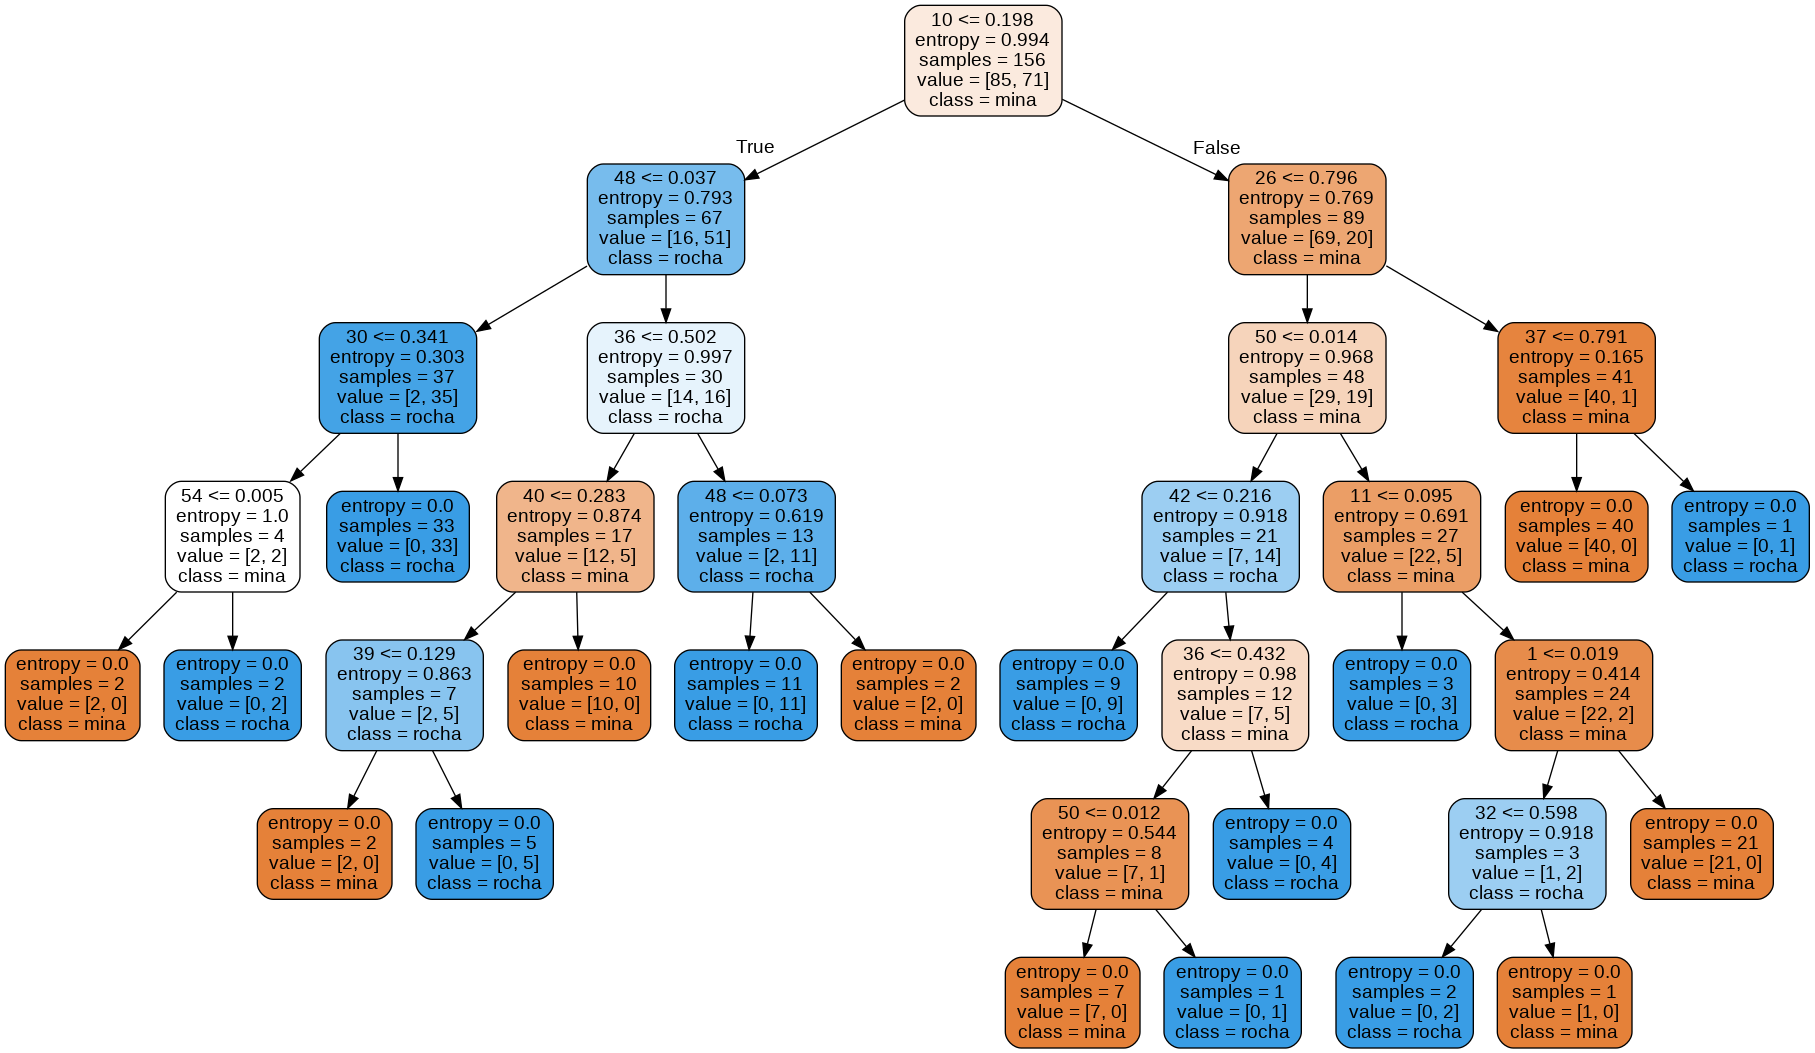

In [11]:
import pydotplus
from IPython.display import Image
# Create DOT data
dot_data = tree.export_graphviz(sonar_tree, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(0,60),  
                                class_names=["mina", "rocha"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
